# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [81]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
ls

CONTRIBUTING.md                      index_files/
LICENSE.md                           multipleChoiceResponses.csv*
README.md                            multipleChoiceResponses_cleaned.csv
flatiron_stats.py                    schema.csv*
index.ipynb


In [4]:
#Your code here
df = pd.read_csv('multipleChoiceResponses_cleaned.csv')
df.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, re

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [ ]:
# H_o- Master's degrees (salaries) =< bachelor's degrees (salaries)

In [ ]:
# H_a - Master's degrees (salaries) > bachelor's degrees (salaries)

In [19]:
#Your code here
df['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [16]:
df['AdjustedCompensation'].value_counts()

100000.000000    60
120000.000000    59
150000.000000    58
71749.560000     47
50000.000000     45
                 ..
70786.560000      1
6880.782804       1
36344.944000      1
106563.600000     1
48126.250000      1
Name: AdjustedCompensation, Length: 1627, dtype: int64

In [33]:
df_bach = df[df['FormalEducation'] == "Bachelor's degree" ]['AdjustedCompensation'].copy()
df_bach.dropna(inplace = True)

In [35]:
df_mast = df[df['FormalEducation'] == "Master's degree" ]['AdjustedCompensation'].copy()
df_mast.dropna(inplace=True)

The median salary for Bachelor's degree is: 38399.4
The median salary for Master's degree is: 53812.17000000001
Sample size for Bachelor's degree: 1107
Sample size for Master's degree: 1990


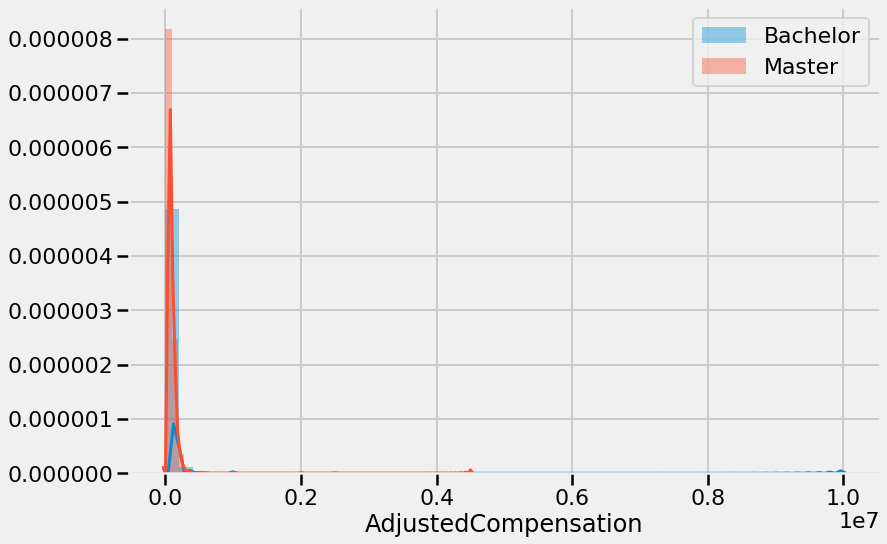

In [58]:
print(f"The median salary for Bachelor's degree is: {df_bach.median()}")
print(f"The median salary for Master's degree is: {df_mast.median()}")
print(f"Sample size for Bachelor's degree: {len(df_bach)}")
print(f"Sample size for Master's degree: {len(df_mast)}")
with plt.style.context('fivethirtyeight'):
    sns.set_context('poster')
    plt.figure(figsize = (12, 8))
    sns.distplot(df_bach, label = 'Bachelor')
    sns.distplot(df_mast, label = 'Master')
    plt.legend();

In [36]:
stats.ttest_ind(df_bach, df_mast, equal_var = False ) #2 sided by defaulth.

Ttest_indResult(statistic=-0.43786693335411514, pvalue=0.6615527890254489)

In [ ]:
# Fail to reject the Null hypothesis because p_val is greater than alpha(0.05), but there are a lot of outliers.

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [ ]:
# H_o- Doctoral degree (salaries) =< bachelor's degrees (salaries)
# H_a- Doctoral degree (salaries) > bachelor's degrees (salaries)

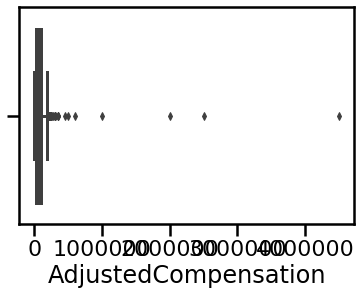

In [66]:
sns.boxplot(df_mast);

In [62]:
df_bach = df[df['FormalEducation'] == "Bachelor's degree" ]['AdjustedCompensation'].copy()
df_bach.dropna(inplace = True)

In [63]:
df_doct = df[df['FormalEducation'] == "Doctoral degree" ]['AdjustedCompensation'].copy()
df_doct.dropna(inplace = True)

The median salary for Bachelor's degree is: 38399.4
The median salary for Doctoral degree is: 74131.91999999997
Sample size for Bachelor's degree: 1107
Sample size for Doctoral degree: 967


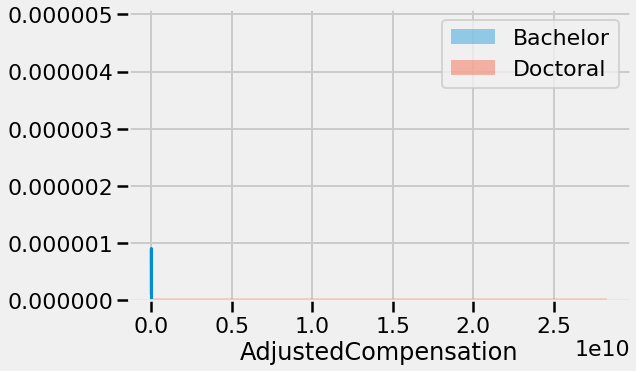

In [73]:
print(f"The median salary for Bachelor's degree is: {df_bach.median()}")
print(f"The median salary for Doctoral degree is: {df_doct.median()}")
print(f"Sample size for Bachelor's degree: {len(df_bach)}")
print(f"Sample size for Doctoral degree: {len(df_doct)}")
with plt.style.context('fivethirtyeight'):
    sns.set_context('poster')
    plt.figure(figsize = (8, 5))
    sns.distplot(df_bach, label = 'Bachelor')
    sns.distplot(df_doct, label = 'Doctoral')
    plt.legend();

In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


In [72]:
stats.ttest_ind(df_bach, df_doct, equal_var = False )

Ttest_indResult(statistic=-1.0081234695549772, pvalue=0.31364763989440514)

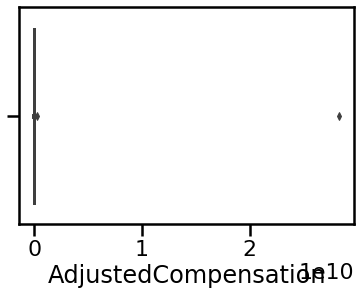

In [71]:
sns.boxplot(df_doct)

In [77]:
df_bach_300 = df_bach[df_bach < 300000]
df_doct_300 = df_doct[df_doct < 300000]

The median salary for Bachelor's degree is: 37487.999999999985
The median salary for Doctoral degree is: 71874.78
Sample size for Bachelor's degree: 1096
Sample size for Doctoral degree: 950


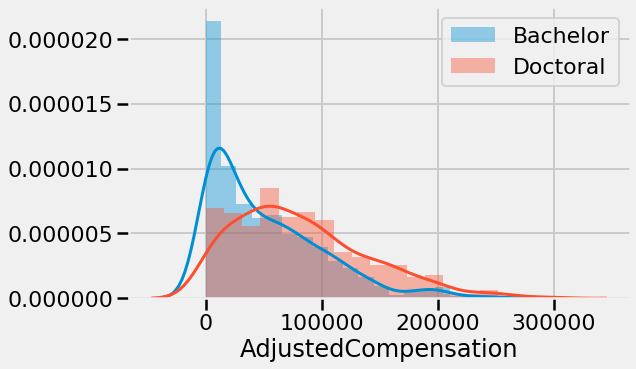

In [78]:
print(f"The median salary for Bachelor's degree is: {df_bach_300.median()}")
print(f"The median salary for Doctoral degree is: {df_doct_300.median()}")
print(f"Sample size for Bachelor's degree: {len(df_bach_300)}")
print(f"Sample size for Doctoral degree: {len(df_doct_300)}")
with plt.style.context('fivethirtyeight'):
    sns.set_context('poster')
    plt.figure(figsize = (8, 5))
    sns.distplot(df_bach_300, label = 'Bachelor')
    sns.distplot(df_doct_300, label = 'Doctoral')
    plt.legend();

In [79]:
stats.ttest_ind(df_bach_300, df_doct_300, equal_var = False )

Ttest_indResult(statistic=-12.810725308612916, pvalue=4.47872834026157e-36)

In [ ]:
# With filtering the outliers, the p_val < alpha(0.05). We reject the Null with 95% confidence. 
# Without filtering the outliers, we fail to reject the Null, which means there is not much defference in salaries
# between Doctoral and Bachelor's degrees. 

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [86]:
#Your code here
formula = 'AdjustedCompensation ~ C(FormalEducation)' 


In [87]:
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [89]:
lm = ols(formula, df[df['AdjustedCompensation'] < 300000]).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.077442e+11     6.0  30.610323  3.526670e-36
Residual            1.185443e+13  4288.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!